Comp Phys

HW #6

Adam Goldenberg

Python 3 Code

Question 1] Code LU Solver

Part A] Make up an upper-triangle N×N matrix U test, a lower-triangle N×N matrix L test, and an N-element vector b test for testing. Make N ≥ 3. Find the corresponding matrix A test = L test * U test and solve for x test using numpy.linalg functions.

We need to solve the folowing equation: A * x = b

In [133]:
import numpy as np

N = 3
U = np.zeros((N, N))
L = np.zeros((N, N))
b = np.zeros(N)

set = 1 #Iterator to set values

#Set the U values
for i in range(0, N):
    for q in range(i, N):
        if(i == q):
            U[i][q] = 1
        else:
            U[i][q] = set
            set = set + 1

set = N   

#Set the L values
for i in range(0, N):
    for q in range(0, i+1):
        if(i == q):
            L[i][q] = 1
        else:
            L[i][q] = set
            set = set - 1

set = N + 5

#Set the b values
for i in range(0, N):
    b[i] = set
    set = set - 1

print("U = ")
print(U)
print("L = ")
print(L)
print("b = ")
print(b)

U = 
[[1. 1. 2.]
 [0. 1. 3.]
 [0. 0. 1.]]
L = 
[[1. 0. 0.]
 [3. 1. 0.]
 [2. 1. 1.]]
b = 
[8. 7. 6.]


In [134]:
#Create the A matrix
A = np.matmul(L, U)

print("A = ")
print(A)

A = 
[[1. 1. 2.]
 [3. 4. 9.]
 [2. 3. 8.]]


In [135]:
#Solving for x
xtest = np.linalg.solve(A, b)

print("x = ")
print(xtest)

#Checks if the equation is solved corectly
print(np.allclose(np.dot(A, xtest), b))

x = 
[ 32. -38.   7.]
True


Part B] Write a routine that, given any L, U, and b, solves for x. The code should allow any size N. DO NOT use any linalg functions from python (numpy or scipy); just use the algorithm presented in class. Test this code on your test matrices to make sure it works properly.

In [147]:
def LUSolver(L, U, b):
    #Solve L * y = b
    N = len(L[0])
    y = np.zeros(N)
    y[0] = b[0]/L[0][0]
    for i in range(1, N):
        sumL = 0
        for j in range(0, i):
            sumL = sumL + (L[i][j] * y[j])
        y[i] = (b[i] - sumL) / L[i][i]
    #print(y)
    
    #solve U * x = y
    x = np.zeros(N)
    x[N-1] = y[N-1]/L[N-1][N-1]
    for i in range(N-2, -1, -1):
        sumL = 0
        for j in range(i+1, N):
            sumL = sumL + (U[i][j] * x[j])
        #print(sumL)
        x[i] = (y[i] - sumL) / U[i][i]
    return x
    
print(LUSolver(L, U, b))

[ 32. -38.   7.]


This is the same result as the np algorithm.

Part C] Using this code, write another routine to invert A, given L and U. Again, DO NOT use any python linalg functions. Test this code as well.

In [148]:
def invLU(L, U):
    N = len(L[0])
    #Crate 3 partial matrixes for each diagonal = 1
    input = np.zeros((N, N))
    a = np.zeros((N,N))
    for i in range(0,N):
        input[i][i] = 1
        a[i] = LUSolver(L, U, input[i])
    
    #create the matrix to return (need to flip over diagonal)
    for i in range(0, N):
        for j in range(0,N):
            input[i][j] = a[j][i]
    
    return input

print(invLU(L, U))

[[ 5. -2.  1.]
 [-6.  4. -3.]
 [ 1. -1.  1.]]


Question 2] Least-Squares Fit

x = 
[0.15555493 0.54296703 0.10495412 0.43738019 0.82997303 0.01558403
 0.47313499 0.17845758 0.80243614 0.14370009 0.41730548 0.94825259
 0.99607557 0.79817166 0.06526181 0.66421262 0.83212533 0.07168155
 0.79212462 0.65872476]
al = 
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]


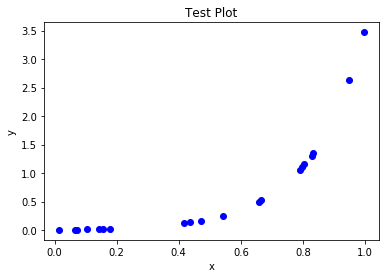

In [149]:
#Part A] create the test data by specification

import numpy as np
import matplotlib.pyplot as plt

x = np.random.random_sample(20)

#Assine the the alpha values
al = np.zeros(8)
al[0] = 0.1
for i in range(1,8):
    al[i] = al[i-1] + 0.1

print("x = ")
print(x)
print("al = ")
print(al)

#Set the y values
y = np.zeros((20,8))
for i in range(0,20):
    xmul = 1
    for j in range(0,8):
        xmul = xmul * x[i]
        y[i][j] = (al[j] * xmul) + (np.random.randn() * (al[j] * xmul * 0.05))

for i in range(0,20):
    plt.plot(x[i], np.sum(y[i]), 'bo')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Plot")
plt.show()

Part B] Construct the matrix A given your random x.

$$y = AB$$ with A being the matrix I am to make and B is the new set of coeficents

In [150]:
A = np.zeros((20,8))
for i in range(0, 20):
    A[i][0] = 1
    for j in range(1, 8):
        A[i][j] = A[i][j-1] * x[i]

print(A)

[[1.00000000e+00 1.55554931e-01 2.41973365e-02 3.76401500e-03
  5.85511092e-04 9.10791373e-05 1.41678089e-05 2.20387253e-06]
 [1.00000000e+00 5.42967029e-01 2.94813194e-01 1.60073844e-01
  8.69148194e-02 4.71918812e-02 2.56236355e-02 1.39127892e-02]
 [1.00000000e+00 1.04954124e-01 1.10153682e-02 1.15610832e-03
  1.21338336e-04 1.27349588e-05 1.33658645e-06 1.40280260e-07]
 [1.00000000e+00 4.37380186e-01 1.91301427e-01 8.36714537e-02
  3.65962360e-02 1.60064685e-02 7.00091217e-03 3.06206027e-03]
 [1.00000000e+00 8.29973033e-01 6.88855236e-01 5.71731269e-01
  4.74521536e-01 3.93840078e-01 3.26876644e-01 2.71298800e-01]
 [1.00000000e+00 1.55840271e-02 2.42861901e-04 3.78476646e-06
  5.89819032e-08 9.19175579e-10 1.43244572e-11 2.23232729e-13]
 [1.00000000e+00 4.73134990e-01 2.23856718e-01 1.05914446e-01
  5.01118304e-02 2.37096604e-02 1.12178699e-02 5.30756676e-03]
 [1.00000000e+00 1.78457582e-01 3.18471086e-02 5.68335801e-03
  1.01423833e-03 1.80998520e-04 3.23005582e-05 5.76427952e-06]


Part C] Use SVD to solve for B that minimizes S.
$$A = UWV^{T}$$
$$A^{-1} = VW^{-1}U^{T}$$

So for our equation
$$AB = y$$
$$B = A^{-1}y$$
$$B = VW^{-1}U^{T}y$$

In [171]:
(U, Wp, Vt) = np.linalg.svd(A)
#construct a full W matrix instead of a vector of it
W = np.zeros((len(Wp), len(Wp)))
for i in range(0,len(Wp)):
    W[i][i] = Wp[i]
part = np.matmul(U.transpose(), y)
part = np.matmul(np.linalg.inv(W), part)
part = np.matmul(Vt, part)
print(part)

ValueError: shapes (8,8) and (20,8) not aligned: 8 (dim 1) != 20 (dim 0)

Error here but I do not know what this is coming from.

Part D] Use the folowing formula to solve for the least squares:
$$(A^{T} * A) * B = A^{T} * y$$
which is turned into the folowing equation,
$$B = (A^{T} * A)^{-1} * A^{T} * y$$

In [154]:
At = A.transpose()
At = np.matmul(At, A)
At = np.linalg.inv(At)
At = np.matmul(At, A.transpose())
At = np.matmul(At, y)
print(At)

[[-7.39232776e-04 -3.64840338e-04  2.60929075e-03 -9.47461125e-04
  -2.21298565e-03  1.67706048e-03  8.17462497e-04  1.30315065e-03]
 [ 1.52100579e-01  1.72732511e-02 -1.78195359e-01  6.51843096e-02
   1.43620846e-01 -9.53413131e-02 -5.68930894e-02 -8.08642617e-02]
 [-1.08633217e+00  2.92122811e-02  3.03507597e+00 -1.12453876e+00
  -2.34868411e+00  1.32978984e+00  9.91537108e-01  1.25164788e+00]
 [ 8.58520584e+00  5.29465247e-01 -2.03866958e+01  7.85928157e+00
   1.56350169e+01 -7.35727456e+00 -6.96461554e+00 -7.77827321e+00]
 [-3.00963656e+01 -8.27776568e-01  6.57684690e+01 -2.56716708e+01
  -4.96281556e+01  1.90145270e+01  2.30386633e+01  2.25775341e+01]
 [ 5.15201452e+01  9.55246051e-01 -1.04793143e+02  4.39338460e+01
   8.06078599e+01 -2.42193956e+01 -3.85236205e+01 -3.22306497e+01]
 [-4.23072294e+01 -7.21634619e-01  8.12598951e+01 -3.61991245e+01
  -6.35560440e+01  1.51367676e+01  3.15922207e+01  2.11520166e+01]
 [ 1.33319364e+01  1.94842004e-01 -2.43868003e+01  1.15411988e+01
   

The al values goten from this vary from point to point and are mostly significantly off.